# Sentiment Analysis on Amazon's Appliances Dataset

In [26]:
#importing Requisite Libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
#Reading Dataset
data=pd.read_json(r"C:\Users\Prithvi\Desktop\DAB303\Individual project\Dataset\Appliances.json.gz",orient='records',lines=True)

In [4]:
data.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


In [5]:
#Reading Meta Data
meta_data=pd.read_json(r"C:\Users\Prithvi\Desktop\DAB303\Individual project\Dataset\meta_Appliances.json.gz",orient='records',lines=True)

In [6]:
meta_data.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[]
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Appliances, Parts &amp; Accessories]",,[],,The Cigar - Moments of Pleasure,[],,The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",{},Amazon Home,,,$150.26,8792559360,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...","[Multi purpost descaler, especially suited to ...",,Caraselle 2X 50G Appliance Descalene,[],,Caraselle,[],"[>#1,654,505 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"December 17, 2014",.a-box-inner{background-color:#fff}#alohaBuyBo...,9792954481,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Full gauge and size beveled-edge; furnished w...,,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[],,EATON Wiring,[Returns will not be honored on this closeout ...,"[>#3,066,990 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"January 16, 2007",$3.43,B00002N5EL,[],[]


In [7]:
#Mering Meta data and Data
df=data.merge(meta_data,on='asin',how='left')

In [8]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Shape of the Merged Dataset
df.shape

(616894, 30)

In [10]:
#Checking for NA VAlues
df.isnull().sum()

overall                 0
vote               550200
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              471888
reviewerName           15
reviewText            327
summary               128
unixReviewTime          0
image              607481
category             1147
tech1                1147
description          1147
fit                  1147
title                1147
also_buy             1147
tech2                1147
brand                1147
feature              1147
rank                 1147
also_view            1147
details              1147
main_cat             1147
similar_item         1147
date                 1147
price                1147
imageURL             1147
imageURLHighRes      1147
dtype: int64

In [11]:
#Dropping Columns with more than 70% missing values
df.drop(['image','style','vote'],axis=1,inplace=True)

In [12]:
#Dropping NA values
df=df.dropna()

In [13]:
#Checking for NA values after cleaning
df.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
unixReviewTime     0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

In [14]:
#Concatinating Reviews and Summary columns as review_text
df['review_text'] = df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
df = df.drop(['reviewText', 'summary'], axis = 1)
df.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes,review_text
35,5,True,"03 20, 2015",A3SHVDMM83IHJ4,B00002N7IL,steve crumpler,1426809600,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Outfit your dryer with top-notch connections ...,,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...","[B000FK9X6W, B000BPFZHM, B000FP8LK6, B00002N7H...",,Leviton,"[Fits all wallplates with 2.15"" diameter cente...","[>#411,187 in Tools & Home Improvement (See to...","[B00002N7HY, B074Q2KZGV, B000FPCL2K, B000FP8LK...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 7, 2004",,[],[],Matched pigtail cord and works great. Just wha...
36,5,True,"03 20, 2015",A3SHVDMM83IHJ4,B00002N7IL,steve crumpler,1426809600,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Outfit your dryer with top-notch connections ...,,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...","[B000FK9X6W, B000BPFZHM, B000FP8LK6, B00002N7H...",,Leviton,"[Fits all wallplates with 2.15"" diameter cente...","[>#411,187 in Tools & Home Improvement (See to...","[B00002N7HY, B074Q2KZGV, B000FPCL2K, B000FP8LK...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 7, 2004",,[],[],Matched pigtail cord and works great. Just wha...
37,5,True,"04 20, 2013",A2OXDRWBASV91Y,B00004SQHD,Harold E. Ewing,1366416000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],complete package I like the fact that the wire...


In [15]:
df.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
unixReviewTime     0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
review_text        0
dtype: int64

In [16]:
#Creating a target column based on ratings 
condition=[(df['overall']>=3),
          (df['overall']<3)]

values=['good','bad']

df['rating_class']=np.select(condition,values)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes,review_text,rating_class
35,5,True,"03 20, 2015",A3SHVDMM83IHJ4,B00002N7IL,steve crumpler,1426809600,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Outfit your dryer with top-notch connections ...,,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...","[B000FK9X6W, B000BPFZHM, B000FP8LK6, B00002N7H...",,Leviton,"[Fits all wallplates with 2.15"" diameter cente...","[>#411,187 in Tools & Home Improvement (See to...","[B00002N7HY, B074Q2KZGV, B000FPCL2K, B000FP8LK...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 7, 2004",,[],[],Matched pigtail cord and works great. Just wha...,good
36,5,True,"03 20, 2015",A3SHVDMM83IHJ4,B00002N7IL,steve crumpler,1426809600,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Outfit your dryer with top-notch connections ...,,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...","[B000FK9X6W, B000BPFZHM, B000FP8LK6, B00002N7H...",,Leviton,"[Fits all wallplates with 2.15"" diameter cente...","[>#411,187 in Tools & Home Improvement (See to...","[B00002N7HY, B074Q2KZGV, B000FPCL2K, B000FP8LK...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 7, 2004",,[],[],Matched pigtail cord and works great. Just wha...,good
37,5,True,"04 20, 2013",A2OXDRWBASV91Y,B00004SQHD,Harold E. Ewing,1366416000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],complete package I like the fact that the wire...,good
38,5,True,"04 20, 2013",A2OXDRWBASV91Y,B00004SQHD,Harold E. Ewing,1366416000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],complete package I like the fact that the wire...,good
39,5,True,"03 16, 2013",A2KG6AWJSWILPR,B00004SQHD,Christopher J Park,1363392000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],Perfect Fit Needed another couple of feet with...,good


In [17]:
# checking duplicates based on'asin', 'reviewName' and 'unixReviewTime'columns
df[df.duplicated(['reviewerName','unixReviewTime','asin'],keep= False)]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes,review_text,rating_class
35,5,True,"03 20, 2015",A3SHVDMM83IHJ4,B00002N7IL,steve crumpler,1426809600,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Outfit your dryer with top-notch connections ...,,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...","[B000FK9X6W, B000BPFZHM, B000FP8LK6, B00002N7H...",,Leviton,"[Fits all wallplates with 2.15"" diameter cente...","[>#411,187 in Tools & Home Improvement (See to...","[B00002N7HY, B074Q2KZGV, B000FPCL2K, B000FP8LK...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 7, 2004",,[],[],Matched pigtail cord and works great. Just wha...,good
36,5,True,"03 20, 2015",A3SHVDMM83IHJ4,B00002N7IL,steve crumpler,1426809600,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Outfit your dryer with top-notch connections ...,,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...","[B000FK9X6W, B000BPFZHM, B000FP8LK6, B00002N7H...",,Leviton,"[Fits all wallplates with 2.15"" diameter cente...","[>#411,187 in Tools & Home Improvement (See to...","[B00002N7HY, B074Q2KZGV, B000FPCL2K, B000FP8LK...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 7, 2004",,[],[],Matched pigtail cord and works great. Just wha...,good
37,5,True,"04 20, 2013",A2OXDRWBASV91Y,B00004SQHD,Harold E. Ewing,1366416000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],complete package I like the fact that the wire...,good
38,5,True,"04 20, 2013",A2OXDRWBASV91Y,B00004SQHD,Harold E. Ewing,1366416000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],complete package I like the fact that the wire...,good
39,5,True,"03 16, 2013",A2KG6AWJSWILPR,B00004SQHD,Christopher J Park,1363392000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],Perfect Fit Needed another couple of feet with...,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608152,5,True,"08 6, 2018",AK3M74BX2O39Z,B01AYTUFV0,Amazon Customer,1533513600,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Kalamera 15&rdquo; Beverage cooler 96 can buil...,"[B01HXP4B6S, B01IEZENDC, B079M6G839, B01IF0BX7...",,Kalamera,[ELEGANT DESIGN: Sleek stainless steel and tra...,"[>#421 in Appliances (See top 100), >#13 in Ho...","[B0786TJC33, B007QAK8RC, B01GRPYI4A, B019230Y2...",{},Appliances,"class=""a-bordered 

In [18]:
#Shape of the Dataset before Removing duplicates
df.shape

(615294, 27)

In [19]:
# Dropping Duplicates
df = df.drop_duplicates(['asin','reviewerName', 'unixReviewTime'], keep = 'first')

In [20]:
#Shape of the Dataset after Removing duplicates
df.shape

(588446, 27)

In [21]:
# Convert time object to datetime and create a new column named 'time'

df['time'] = df.reviewTime.str.replace(',', "")
df['time'] = pd.to_datetime(df['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
df = df.drop('reviewTime', axis = 1)
df.head()

,overall,verified,reviewerID,asin,reviewerName,unixReviewTime,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes,review_text,rating_class,time
35,5,True,A3SHVDMM83IHJ4,B00002N7IL,steve crumpler,1426809600,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Outfit your dryer with top-notch connections ...,,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...","[B000FK9X6W, B000BPFZHM, B000FP8LK6, B00002N7H...",,Leviton,"[Fits all wallplates with 2.15"" diameter cente...","[>#411,187 in Tools & Home Improvement (See to...","[B00002N7HY, B074Q2KZGV, B000FPCL2K, B000FP8LK...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","July 7, 2004",,[],[],Matched pigtail cord and works great. Just wha...,good,2015-03-20
37,5,True,A2OXDRWBASV91Y,B00004SQHD,Harold E. Ewing,1366416000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],complete package I like the fact that the wire...,good,2013-04-20
39,5,True,A2KG6AWJSWILPR,B00004SQHD,Christopher J Park,1363392000,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],Perfect Fit Needed another couple of feet with...,good,2013-03-16
41,5,True,A2CBE6VYOARZN4,B00004SQHD,Gerry,1487030400,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],Everything works Good quality at a reasonable ...,good,2017-02-14
43,5,True,AVKOTZD5ZIOX5,B00004SQHD,Dan W.,1482278400,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Coleman Cable 09045 5-Foot Range Cord Made of...,,Coleman Cable 09045 5-Foot Range Cord,[],,Coleman Cable,"[Range and dryer cord, Made of thick vinyl ins...","[>#728,958 in Tools & Home Improvement (See to...","[B00LQDFOMY, B002R0DXNW, B001AAEGBS, B004LYLP7...",{},Tools & Home Improvement,"class=""a-bordered a-horizontal-stripes a-spa...","January 13, 2009",$1.41,[],[],50 amp cable Planning on hooking this to my RV,good,2016-12-21


In [22]:
#MAking  a COpy for Safety
df_viz=df.copy()

# DESCRIPTIVE STATISTICS

In [23]:
### Total reviews
total = len(df_viz)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(df_viz.reviewerID.unique()))
reviewer_prop = float(len(df_viz.reviewerID.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(df_viz.asin.unique()))
product_prop = float(len(df_viz.asin.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(df_viz.overall.mean(),3))

Number of reviews:  588446

Number of unique reviewers:  513370
Prop of unique reviewers:  0.872

Number of unique products:  30226
Prop of unique products:  0.051

Average rating score:  4.275


Text(0, 0.5, 'Number of Reviews')

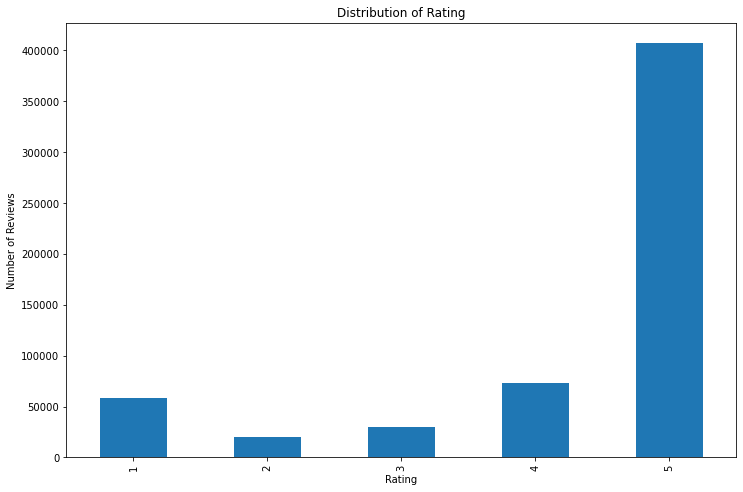

In [27]:
#Distribution of Rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
df_viz['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

>There are more than 80% of 5 star rating and 2 is the least rating for the products

In [28]:
#Distribution of Target Column
df['rating_class'].value_counts()

good    509820
bad      78626
Name: rating_class, dtype: int64

In [29]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(df_viz['reviewerID'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(df_viz['asin'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(df_viz)/len(df_viz['reviewerID'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(df_viz)/len(df_viz['asin'].unique()))))



Number of unique customers : 513370

Number of unique products : 30226

Review per customer: 1.1462415022303603

Review per product: 19.46820618010984


In [30]:
class_counts = df_viz.groupby('overall').size()
class_counts

overall
1     58346
2     20280
3     29587
4     73492
5    406741
dtype: int64

# Descriptive Statistics Summary

>Rating Status:

513370 have given rating.

According to the statistics on rating stars:

58346 customers give 1 star

20280 customers give 2 stars

29587 customers give 3 stars

73492 customers give 4 stars

406741 customers give 5 stars

81699 customers give bad ratings

533595 customers give good ratings




In [31]:
#Dropping All columns except the Dependent and Independent variable
df=df[['rating_class','review_text']]

In [32]:
df.head()

,rating_class,review_text
35,good,Matched pigtail cord and works great. Just wha...
37,good,complete package I like the fact that the wire...
39,good,Perfect Fit Needed another couple of feet with...
41,good,Everything works Good quality at a reasonable ...
43,good,50 amp cable Planning on hooking this to my RV


# Text Pre Processing

In [33]:
#importing Requisite Libraries
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
import contractions
from contractions import contractions_dict
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string

In [34]:
#Creating a Contractions Map
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [35]:
#Removing Html Tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#remove Html tags
df['review_text']=df['review_text'].apply(lambda x:strip_html(x))

C:\ProgramData\Anaconda3\envs\DAB300\lib\site-packages\bs4\__init__.py:337: MarkupResemblesLocatorWarning: "Five Stars arrived on time.....installed and starting working immediately.....very satasified./.." looks like a directory name, not markup. You may want to open a file found in this directory and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [36]:
#Lowering the text
def Lower(text):
    return text.lower()

df['review_text']=df['review_text'].apply(lambda x:Lower(x))

In [37]:
#Removing Square Brackets
df['review_text']=df['review_text'].apply(lambda x:re.sub('\[[^]]*\]', '', x))

#Expanding Contractions
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


df['review_text']=df['review_text'].apply(lambda x:expand_contractions(x))

In [38]:
#Removing Special Characyers
pattern = r'[^a-zA-z0-9.,!?/:;\"\'\s]'

df['review_text']=df['review_text'].apply(lambda x:re.sub(pattern,'',x))

In [39]:
# Removing accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

df['review_text']=df['review_text'].apply(lambda x:remove_accented_chars(x))

In [40]:
# Removing punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

df['review_text']=df['review_text'].apply(lambda x:remove_punctuation(x))

In [41]:
#Tokenizing the Text
df['review_text']=df['review_text'].apply(lambda x:word_tokenize(x))

In [42]:
stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

df['review_text']=df['review_text'].apply(lambda x:remove_stopwords(x))

In [43]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

df['review_text']=df['review_text'].apply(lambda x:" ".join(lemmatize(x)))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prithvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
df.head()

,rating_class,review_text
35,good,match pigtail cord work great need electric ra...
37,good,complete package like fact wire end mount tip ...
39,good,perfect fit need another couple feet new dryer...
41,good,everything work good quality reasonable price
43,good,50 amp cable plan hook rv


# LSTM Model

In [45]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
import gensim
from gensim.models.word2vec import Word2Vec
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [46]:
#Reasinging the target values as integers
df['rating_class'] = df['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [47]:
# Splitting the Data Set into Train and Test Sets
X = df['review_text']
y = df['rating_class']

In [48]:
samples = X
tokenizer = Tokenizer(lower=True, split=' ') # creates tokenizer
tokenizer.fit_on_texts(samples)  # builds the word index
sequences = tokenizer.texts_to_sequences(samples) #turns strings into list of integers
# word_index is a dictionary mapping words to an integer index
word_index = tokenizer.word_index 
print(f'Found {len(word_index)} unique tokens. ')

Found 124117 unique tokens. 


In [49]:
word_index

{'not': 1,
 'work': 2,
 'star': 3,
 'great': 4,
 'five': 5,
 'filter': 6,
 'fit': 7,
 'one': 8,
 'good': 9,
 'water': 10,
 'product': 11,
 'use': 12,
 'part': 13,
 'buy': 14,
 'get': 15,
 'price': 16,
 'easy': 17,
 'perfect': 18,
 'like': 19,
 'would': 20,
 'no': 21,
 'need': 22,
 'make': 23,
 'time': 24,
 'well': 25,
 'replacement': 26,
 'ice': 27,
 'replace': 28,
 'install': 29,
 'dryer': 30,
 'new': 31,
 'look': 32,
 'come': 33,
 'perfectly': 34,
 'go': 35,
 'purchase': 36,
 'washer': 37,
 'old': 38,
 'take': 39,
 'order': 40,
 'much': 41,
 'original': 42,
 'machine': 43,
 'find': 44,
 'fridge': 45,
 'clean': 46,
 'love': 47,
 'fine': 48,
 'fix': 49,
 'refrigerator': 50,
 'instal': 51,
 'better': 52,
 'two': 53,
 'quality': 54,
 'back': 55,
 'little': 56,
 'unit': 57,
 'last': 58,
 'say': 59,
 'right': 60,
 'could': 61,
 'problem': 62,
 'taste': 63,
 'exactly': 64,
 'dishwasher': 65,
 'ship': 66,
 'wash': 67,
 'really': 68,
 'four': 69,
 '2': 70,
 'months': 71,
 'first': 72,
 'recom

In [53]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])

In [54]:
def sequence_to_text(sequence):
    words =  [reverse_word_index.get(letter) for letter in sequence]
    return words

my_text = list(map(sequence_to_text, sequences))

[[219, 4899, 541, 2, 4, 22, 515, 133, 219, 4899, 541, 2, 4],
 [530,
  211,
  19,
  519,
  232,
  199,
  394,
  731,
  1314,
  541,
  2759,
  2299,
  730,
  260,
  20,
  73,
  897,
  576],
 [18, 7, 22, 134, 225, 600, 31, 30, 18, 7, 118, 924, 1195, 541, 1265, 363],
 [198, 2, 9, 54, 502, 16],
 [601, 2858, 1069, 687, 568, 1083],
 [9,
  133,
  541,
  552,
  10226,
  46331,
  7,
  10226,
  20790,
  11,
  209,
  239,
  8,
  19,
  46332,
  11,
  23,
  24342,
  23,
  9,
  454,
  8862,
  1069,
  18513,
  24342,
  35,
  220,
  185,
  146,
  10227,
  14,
  23,
  24342,
  20791,
  46333,
  20,
  14,
  6608,
  19,
  338,
  92,
  1168,
  23,
  9,
  405,
  21,
  1137,
  548,
  7,
  25,
  9282,
  20790,
  86,
  25,
  1699,
  516,
  19,
  13080,
  115,
  427,
  29,
  337,
  133,
  22,
  156,
  239,
  1937,
  2311],
 [69, 3, 2, 4],
 [9,
  54,
  12,
  6682,
  228,
  9,
  54,
  12,
  6682,
  228,
  10538,
  14573,
  364,
  185,
  2559,
  2355],
 [5, 3, 113],
 [1069,
  2,
  224,
  3692,
  1,
  64,
  288,
  

# Word2Vec and Simple Neural Network

In [58]:
word2vec = gensim.models.Word2Vec(my_text,
                                  size=100,
                                  window=10,
                                  min_count=1)
word2vec.train(my_text, total_examples=25026, epochs=10)

(102516886, 122743160)

In [61]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=5)]
                  for search_term in ['quality', 'better', 'problem', 'taste', 'original', 'bad', 'great','price','perfect']}
similar_words

{'quality': ['clampedwelded',
  'craftsmanship',
  'packaing',
  'workmanship',
  'qualityones'],
 'better': ['nicer', 'sturdier', 'stronger', 'weaker', 'safer'],
 'problem': ['issue', 'dilemma', 'pblm', 'mfi2569yem0', 'nonrefrigerating'],
 'taste': ['flavor', 'aftertaste', 'tast', 'smelltaste', 'tasteless'],
 'original': ['originals', 'oem', 'orginal', 'orignal', 'factory'],
 'bad': ['horrible', 'terrible', 'wrong', 'funny', 'foul'],
 'great': ['good', 'awesome', 'excellent', 'fantastic', 'wonderfully'],
 'price': ['retail', 'bargain', 'cost', 'multipacks', 'amazoncwd'],
 'perfect': ['perfectly', 'exact', 'prefect', 'great', 'ackwardly']}

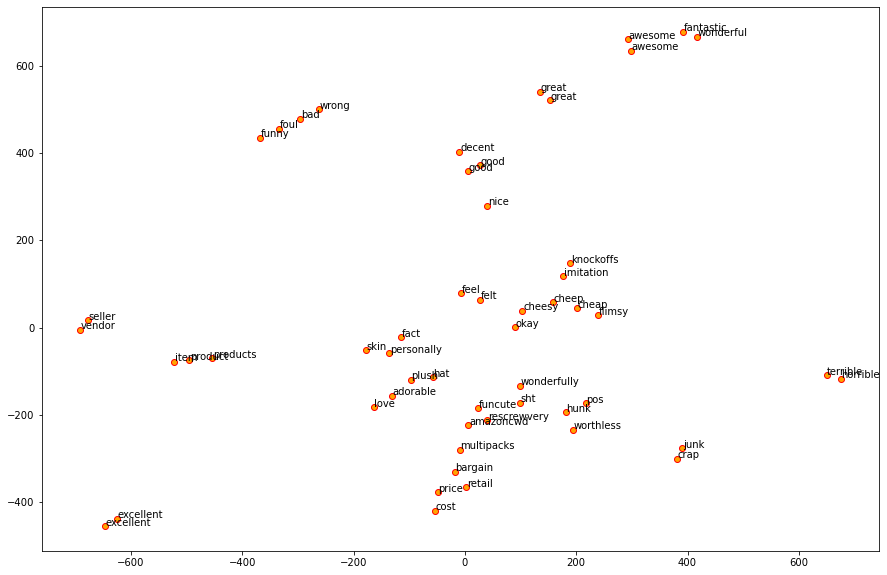

In [60]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(15, 10))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, yt in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, yt+1), xytext=(0, 0), textcoords='offset points')

In [90]:
len(word2vec.wv.vocab)

124117

>I have created word vectors using Word2Vec and the model has 124117 unique words where each word has a vector length of 100

>Now we are going to use these dense vectors - word embeddings - in a simple neural network to predict


In [75]:
max_length = 200 # fix the length of each review 
max_words = len(word_index.keys()) # fix number of words 

training_samples = 470756
validation_samples = 117690
data = pad_sequences(sequences, maxlen=max_length)

labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)


Shape of data tensor: (588446, 200)
Shape of label tensor: (588446,)


In [76]:
x_train = data[:training_samples]
y_train = y[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = y[training_samples: training_samples + validation_samples]
print('Shape of training data: ', x_train.shape)
print('Shape of validation data: ', x_val.shape)

Shape of training data:  (470756, 200)
Shape of validation data:  (117690, 200)


In [78]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words+1, embedding_dim))
for word , i in word_index.items():
    embedding_vector = word2vec.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [79]:
embedding_matrix.shape

(124118, 100)

In [84]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout , LSTM


# define model
model = Sequential()
model.add(Embedding(max_words+1, embedding_dim, input_length=max_length))
model.add(Dropout(0.2))
model.add(LSTM(200, dropout = 0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = "sigmoid"))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 100)          12411800  
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               240800    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                12864     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 12,665,529
Trainable params: 12,665,529
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [88]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=1,
                    batch_size=32,
                    validation_data=(x_val, y_val))

14712/14712 [==============================] - 2730s 185ms/step - loss: 0.1122 - acc: 0.9565 - val_loss: 0.1140 - val_acc: 0.9547


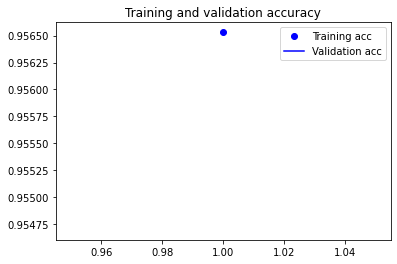

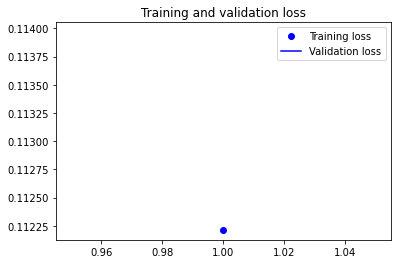

In [89]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()